## Plotting machin because R prout prout

In [78]:
from matplotlib import pyplot as plt
from matplotlib import axes as ax
import numpy as np
import pandas as pd
from statistics import mean

In [104]:
dataset = pd.read_excel('FunEco-OUTSIDE.xlsx', skiprows=2)
#print(dataset)
measurements = pd.read_excel('Measurement Campaign.xlsx')
#print(measurements)

   Unnamed: 0 Replication  living Pak Choï #/5 living Peas #/5  \
0  2022-03-24          C1                    5               -   
1         NaT          C2                    5               -   
2         NaT          C3                    5               -   
3         NaT          T1                    4               0   
4         NaT          T2                    5               3   
5         NaT          T3                    5               4   
6  2022-04-07          C1                    5               -   
7         NaT          C2                    5               -   
8         NaT          C3                    5               -   
9         NaT          T1                    5               5   
10        NaT          T2                    5               5   
11        NaT          T3                    5               4   
12 2022-04-28          C1                    5               -   
13        NaT          C2                    5               -   
14        

<function matplotlib.pyplot.show(close=None, block=None)>

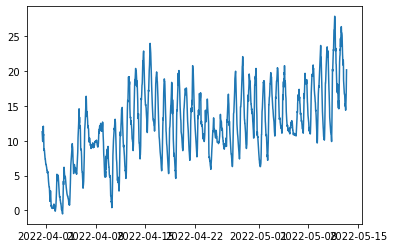

In [59]:
time = dataset.iloc[0:2062,0]
temp = dataset.iloc[0:2062,3]
#doing a day average
plt.plot(time,temp)
plt.show


In [152]:
# Temperature and humidity in pots for comparison
C_temp = [9.53, 9.47, 9.7, 18.13, 18.63, 18.37, 23.37,22.9,25.1]
C_temp_avg = [9.57, 18.377,23.79]
T_temp = [9.6,9.5,9.56,14.27,14.37,16.5,23.97,23.5,26.4]
T_temp_avg = [9.553,15.047,24.623]
C_hum = [33.37,31.13,15.37,27.17,33.7,23.3,24.5,24.4,19.7]
C_hum_avg = [26.623, 28.057,22.87]
T_hum = [33.83,23.53,32.23,32.47,28.87,24.77,13.33,16.53,8.73]
T_hum_avg = [29.863,28.703,12.863]
time_msm = [14,35,49]
print(len(time_msm),len(C_hum_avg))

3 3


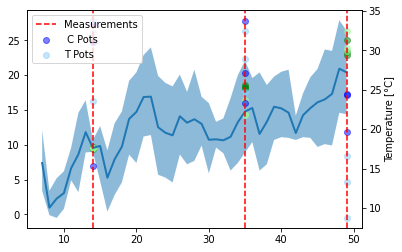

In [136]:
tempday = []
tempdaymax = []
tempdaymin = []
for i in range(0,len(temp),48):
    tempday.append(mean(temp[i:i+48]))
    tempdaymax.append(max(temp[i:i+48]))
    tempdaymin.append(min(temp[i:i+48]))
timeday = []
for i in range(7,50):
    timeday.append(i)
#plot
fig, ax = plt.subplots()
plt.fill_between(timeday,tempdaymax,tempdaymin, alpha=.5, linewidth=0, label="Max and Min")
plt.plot(timeday, tempday, linewidth=2, label="Mean")
plt.scatter(time_msm, C_temp_avg, c='g', alpha=0.5, label = " C Pots")
plt.scatter(time_msm, T_temp_avg, c='palegreen', alpha=0.5, label = "T Pots")
axis_hum = plt.twinx()
plt.scatter(time_msm, C_hum_avg, c='blue', alpha=0.5, label = " C Pots")
plt.scatter(time_msm, T_hum_avg, c='lightskyblue', alpha=0.5, label = "T Pots")
plt.xlabel("Time [days]")
plt.ylabel("Temperature [°C]")
plt.axvline(x=14, color='red', linestyle='--', label  = "Measurements")
plt.axvline(x=35, color='red', linestyle='--')
plt.axvline(x=49, color='red', linestyle='--')
plt.legend(loc='upper left')

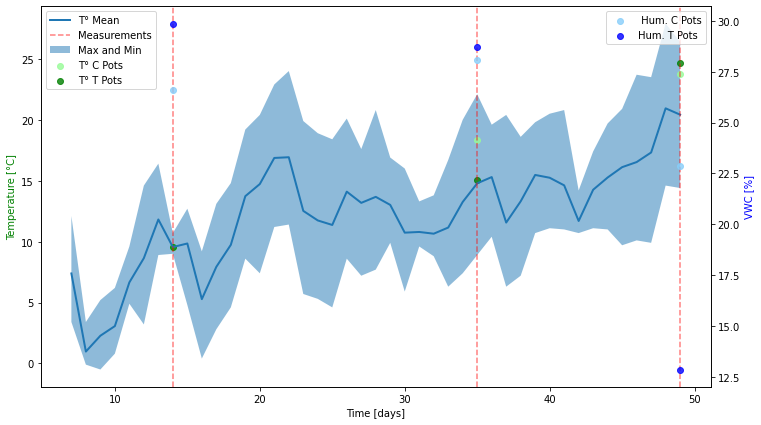

In [171]:
fig, ax1 = plt.subplots()
ax1.fill_between(timeday,tempdaymax,tempdaymin, alpha=.5, linewidth=0, label="Max and Min")
ax1.plot(timeday, tempday, linewidth=2, label="T° Mean")
ax1.scatter(time_msm, C_temp_avg, c='palegreen', alpha=0.8, label = "T° C Pots")
ax1.scatter(time_msm, T_temp_avg, c='g', alpha=0.8, label = "T° T Pots")
ax2 = ax1.twinx()
ax2.set_ylabel("VWC [%]", color = "blue")
ax2.scatter(time_msm, C_hum_avg, c='lightskyblue', alpha=0.8, label = " Hum. C Pots")
ax2.scatter(time_msm, T_hum_avg, c='blue', alpha=0.8, label = "Hum. T Pots")
ax1.set_xlabel("Time [days]")
ax1.set_ylabel("Temperature [°C]", color= "g")
ax1.axvline(x=14, color='red', linestyle='--', alpha=0.5, label  = "Measurements")
ax1.axvline(x=35, color='red', linestyle='--', alpha=0.5)
ax1.axvline(x=49, color='red', linestyle='--', alpha=0.5)
#ax1.legend(loc='upper left')
ax1.legend(loc='upper left')
plt.legend()
plt.rcParams['figure.figsize'] = [10, 5]

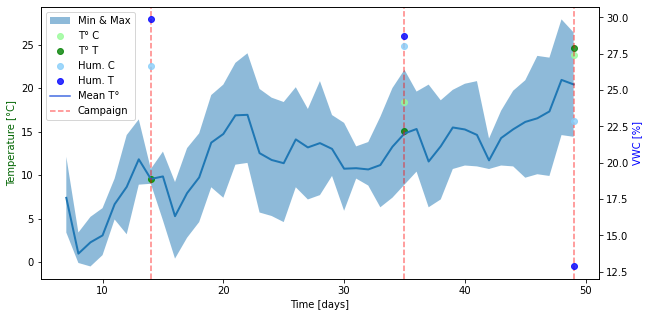

In [186]:
### CHOSEN PLOT ###
fig, ax1 = plt.subplots()
#Temperature
fill = ax1.fill_between(timeday,tempdaymax,tempdaymin, alpha=.5, linewidth=0, label="Max and Min")
mean = ax1.plot(timeday, tempday, linewidth=2, label="T° Mean")
C_T = ax1.scatter(time_msm, C_temp_avg, c='palegreen', alpha=0.8, label = "T° C Pots")
T_T = ax1.scatter(time_msm, T_temp_avg, c='g', alpha=0.8, label = "T° T Pots")
ax2 = ax1.twinx()
#Humidity
ax2.set_ylabel("VWC [%]", color = "blue")
C_H = ax2.scatter(time_msm, C_hum_avg, c='lightskyblue', alpha=0.8, label = " Hum. C Pots")
T_H = ax2.scatter(time_msm, T_hum_avg, c='blue', alpha=0.8, label = "Hum. T Pots")
ax1.set_xlabel("Time [days]")
ax1.set_ylabel("Temperature [°C]", color= "darkgreen")
#Campaigns
measure = ax1.axvline(x=14, color='red', linestyle='--', alpha=0.5, label  = "Measurements")
ax1.axvline(x=35, color='red', linestyle='--', alpha=0.5)
ax1.axvline(x=49, color='red', linestyle='--', alpha=0.5)

#ax1.legend(loc='upper left')
# proxy artist for mean
import matplotlib.lines as mlines
mean_blue = mlines.Line2D([],[], color="royalblue", label = "Mean T°")
plt.legend([fill,C_T,T_T,C_H,T_H,mean_blue,measure], ["Min & Max", "T° C", "T° T","Hum. C","Hum. T","Mean T°", "Campaign"], loc="upper left")
plt.rcParams['figure.figsize'] = [10, 5]

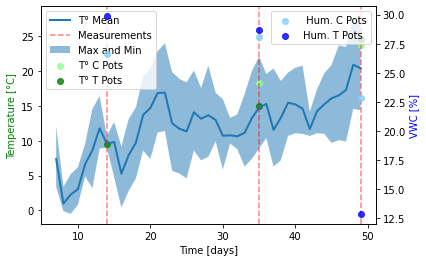

In [160]:
fig, ax1 = plt.subplots()
#Temperature
ax1.fill_between(timeday,tempdaymax,tempdaymin, alpha=.5, linewidth=0, label="Max and Min")
ax1.plot(timeday, tempday, linewidth=2, label="T° Mean")
ax1.scatter(time_msm, C_temp_avg, c='palegreen', alpha=0.8, label = "T° C Pots")
ax1.scatter(time_msm, T_temp_avg, c='g', alpha=0.8, label = "T° T Pots")
ax2 = ax1.twinx()
#Humidity
ax2.set_ylabel("VWC [%]", color = "blue")
ax2.scatter(time_msm, C_hum_avg, c='lightskyblue', alpha=0.8, label = " Hum. C Pots")
ax2.scatter(time_msm, T_hum_avg, c='blue', alpha=0.8, label = "Hum. T Pots")
ax1.set_xlabel("Time [days]")
ax1.set_ylabel("Temperature [°C]", color= "g")
#Campaigns
ax1.axvline(x=14, color='red', linestyle='--', alpha=0.5, label  = "Measurements")
ax1.axvline(x=35, color='red', linestyle='--', alpha=0.5)
ax1.axvline(x=49, color='red', linestyle='--', alpha=0.5)
#ax1.legend(loc='upper left')
ax1.legend(loc='upper left')
plt.legend()

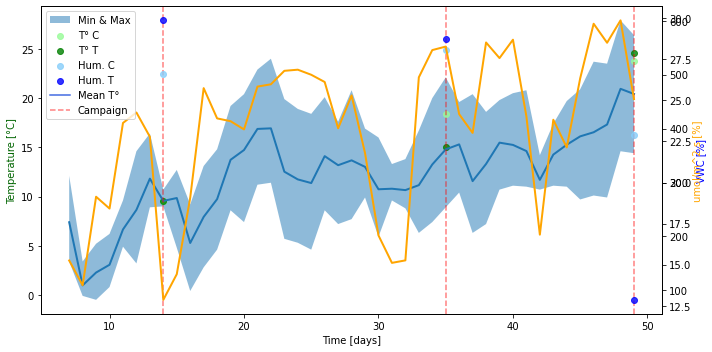

In [191]:
fig, ax1 = plt.subplots()
fill = ax1.fill_between(timeday,tempdaymax,tempdaymin, alpha=.5, linewidth=0, label="Max and Min")
mean = ax1.plot(timeday, tempday, linewidth=2, label="T° Mean")
C_T = ax1.scatter(time_msm, C_temp_avg, c='palegreen', alpha=0.8, label = "T° C Pots")
T_T = ax1.scatter(time_msm, T_temp_avg, c='g', alpha=0.8, label = "T° T Pots")

ax2 = ax1.twinx()
ax2.set_ylabel("VWC [%]", color = "blue")
C_H = ax2.scatter(time_msm, C_hum_avg, c='lightskyblue', alpha=0.8, label = " Hum. C Pots")
T_H = ax2.scatter(time_msm, T_hum_avg, c='blue', alpha=0.8, label = "Hum. T Pots")
ax1.set_xlabel("Time [days]")
ax1.set_ylabel("Temperature [°C]", color= "darkgreen")
measure = ax1.axvline(x=14, color='red', linestyle='--', alpha=0.5, label  = "Measurements")
ax1.axvline(x=35, color='red', linestyle='--', alpha=0.5)
ax1.axvline(x=49, color='red', linestyle='--', alpha=0.5)
#light
ax3 = ax1.twinx()
ax3.plot(timeday, lightday, linewidth=2, color="orange", label="Light")
ax3.set_ylabel("umol/m^2.s [%]", color = "orange")
#ax1.legend(loc='upper left')
# proxy artist for mean
import matplotlib.lines as mlines
mean_blue = mlines.Line2D([],[], color="royalblue", label = "Mean T°")
plt.legend([fill,C_T,T_T,C_H,T_H,mean_blue,measure], ["Min & Max", "T° C", "T° T","Hum. C","Hum. T","Mean T°", "Campaign"], loc="upper left")
plt.rcParams['figure.figsize'] = [10, 5]
plt.tight_layout()

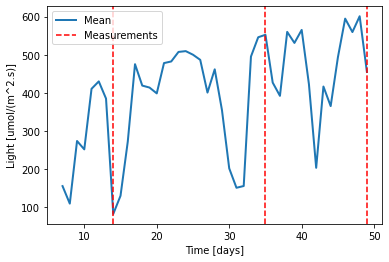

In [103]:
# same but with light
light = dataset.iloc[0:2062,1]
lightday = []
lightdaymax = []
lightdaymin = []
for i in range(0,len(light),48):
    lightday.append(mean(light[i:i+48]))
    lightdaymax.append(max(light[i:i+48]))
    lightdaymin.append(min(light[i:i+48]))
timeday = []
for i in range(7,50):
    timeday.append(i)
#plot
fig, ax = plt.subplots()
#plt.fill_between(timeday,lightdaymax,lightdaymin, alpha=.5, linewidth=0, label="Max and Min")
plt.plot(timeday, lightday, linewidth=2, label="Mean")
plt.xlabel("Time [days]")
plt.ylabel("Light [umol/(m^2.s)]")
plt.axvline(x=14, color='red', linestyle='--', label  = "Measurements")
plt.axvline(x=35, color='red', linestyle='--')
plt.axvline(x=49, color='red', linestyle='--')
plt.legend(loc='upper left')